01-BU
Flight passanger satisfaction

In [62]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Flight passangers satisfaction').getOrCreate()

02-DU

In [63]:
df = spark.read.csv('airline_passenger satisfaction raw.csv',header=True, inferSchema=True, encoding='ISO-8859-1')

2.1 Collect initial data

In [64]:
df.show(truncate=False)
df.show(26)
df.columns

+---+--------------+------+---+-------------+--------------+----------+---------------+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+----------------+-----------+--------------+-----------------+----------------------+-----------------------+----------------+-----------------------+
|ID |Aircraft      |Gender|Age|Customer Type|Type of Travel|Cabin Type|Flight Distance|Departure Delay|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|Leg Room Service|Cleanliness|Food and Drink|In-flight Service|In-flight Wifi Service|In-flight Entertainment|Baggage Handling|Satisfaction           |
+---+--------------+------+---+-------------+--------------+----------+---------------+---------------+-------------+--------------------------------------+----------------------+-------

['ID',
 'Aircraft',
 'Gender',
 'Age',
 'Customer Type',
 'Type of Travel',
 'Cabin Type',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

2.2 Describe the data

In [65]:
df.describe().show()

+-------+-----------------+--------+------+------------------+-------------+--------------+------------+------------------+------------------+------------------+--------------------------------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------------+------------------+--------------------+
|summary|               ID|Aircraft|Gender|               Age|Customer Type|Type of Travel|  Cabin Type|   Flight Distance|   Departure Delay|     Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|  Check-in Service|   Online Boarding|     Gate Location|  On-board Service|     Seat Comfort|  Leg Room Service|       Cleanliness|    Food and Drink| In-flight Service|In-flight Wifi Service|In-flight Entertainment|  Baggage Handling|        Satisfaction|
+-------+-----------------+--------+--

2.3 Explore Data

In [66]:
df.printSchema()

# Display summary statistics
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 1000)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 1000)

df.describe().show()

root
 |-- ID: integer (nullable = true)
 |-- Aircraft: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Wif

+-------+-----------------+--------+------+------------------+-------------+--------------+------------+------------------+------------------+------------------+--------------------------------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+----------------------+-----------------------+------------------+--------------------+
|summary|               ID|Aircraft|Gender|               Age|Customer Type|Type of Travel|  Cabin Type|   Flight Distance|   Departure Delay|     Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|  Check-in Service|   Online Boarding|     Gate Location|  On-board Service|     Seat Comfort|  Leg Room Service|       Cleanliness|    Food and Drink| In-flight Service|In-flight Wifi Service|In-flight Entertainment|  Baggage Handling|        Satisfaction|
+-------+-----------------+--------+--

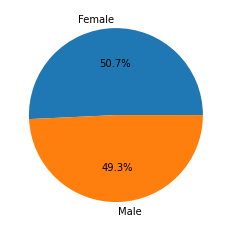

In [67]:
import matplotlib.pyplot as plt
gender_counts = df.groupBy("Gender").count().collect()
genders = [row["Gender"] for row in gender_counts]
counts = [row["count"] for row in gender_counts]
plt.pie(counts, labels=genders, autopct='%1.1f%%')
plt.show()

+-------------+------+
|Customer Type| count|
+-------------+------+
|   First-time| 23780|
|    Returning|106100|
+-------------+------+



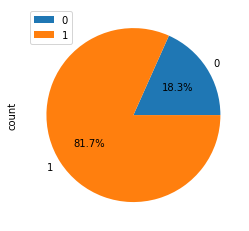

In [68]:
customer_type_counts = df.groupBy('Customer Type').count()
customer_type_counts.show()
customer_type_counts.toPandas().plot.pie(y='count', autopct='%1.1f%%')
plt.show()

+--------------+-----+
|Type of Travel|count|
+--------------+-----+
|      Personal|40187|
|      Business|89693|
+--------------+-----+



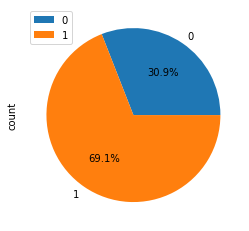

In [69]:
travel_type_counts = df.groupBy('Type of Travel').count()
travel_type_counts.show()
travel_type_counts.toPandas().plot.pie(y='count', autopct='%1.1f%%')
plt.show()

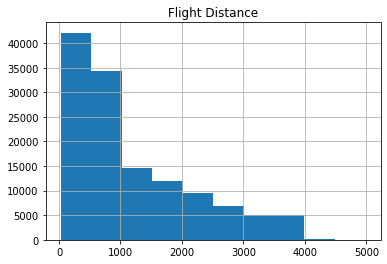

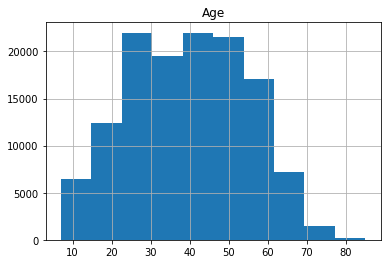

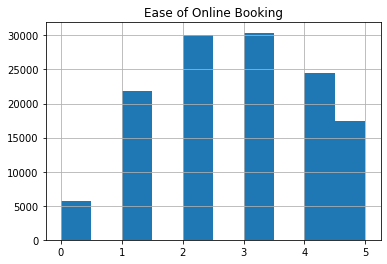

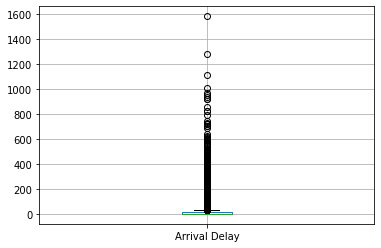

In [70]:
df.select('Flight Distance').toPandas().hist()
plt.show()


df.select('Age').toPandas().hist()
plt.show()


df.select('Ease of Online Booking').toPandas().hist()
plt.show()


df.select('Arrival Delay').toPandas().boxplot()
plt.show()

2.4 Verify the data quality 

In [71]:
flight_distance_stats = df.describe('Arrival Delay','Departure Delay')
flight_distance_stats.show()

+-------+------------------+------------------+
|summary|     Arrival Delay|   Departure Delay|
+-------+------------------+------------------+
|  count|            129480|            129876|
|   mean|15.090438677788075|14.713195663556007|
| stddev|38.465776886699246| 38.07039443248041|
|    min|                 0|                 0|
|    max|              1584|              1592|
+-------+------------------+------------------+



03 DP

3.1 Select the data

In [72]:
from pyspark.sql.functions import col
#delete some attributes

df_03 = df.drop('Aircraft', 'Type of Travel', 'In-flight Wifi Service')

df_03.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

3.2 Clean the data

3.2.1 Extreme Delays Value Issues 

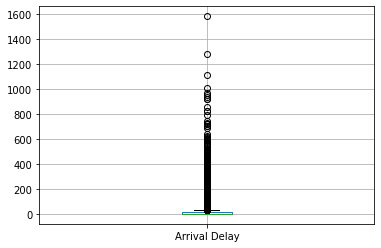

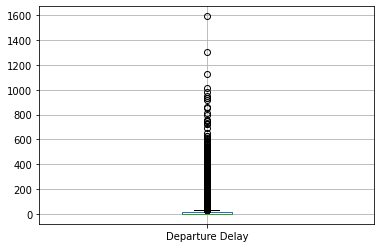

In [73]:
import matplotlib.pyplot as plt

arrival_delay_data = df_03.select('Arrival Delay').toPandas()
arrival_delay_data.boxplot()
plt.show()

departure_delay_data = df_03.select('Departure Delay').toPandas()
departure_delay_data.boxplot()
plt.show()


In [74]:
filtered_df = df_03.filter((col('Arrival Delay') < 1000) & (col('Departure Delay') < 1000))
filtered_df.printSchema()
row_count = filtered_df.count()
print("filted rows {} ".format(row_count))

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

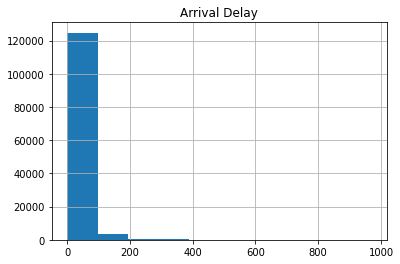

In [75]:
arrival_delay_data = filtered_df.select('Arrival Delay').toPandas()
arrival_delay_data.hist()
plt.title('Arrival Delay')
plt.show()

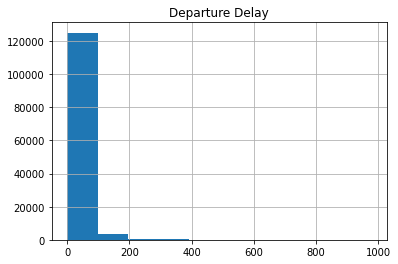

In [76]:
departure_delay_data = filtered_df.select('Departure Delay').toPandas()
departure_delay_data.hist()
plt.title('Departure Delay')
plt.show()

In [18]:
max_values = filtered_df.select(
    col('Arrival Delay').alias('Max Arrival Delay'),
    col('Departure Delay').alias('Max Departure Delay')
).agg(
    {"Max Arrival Delay": "max", "Max Departure Delay": "max"}
).collect()
max_arrival_delay = max_values[0]["max(Max Arrival Delay)"]
max_departure_delay = max_values[0]["max(Max Departure Delay)"]
print("Max of Arrival Delay:", max_arrival_delay)
print("Max of Departure Delay:", max_departure_delay)

Max of Arrival Delay: 970
Max of Departure Delay: 978


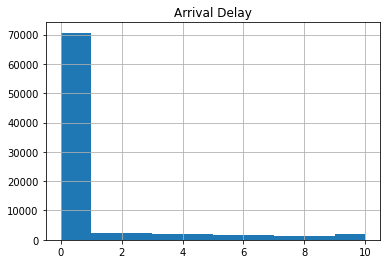

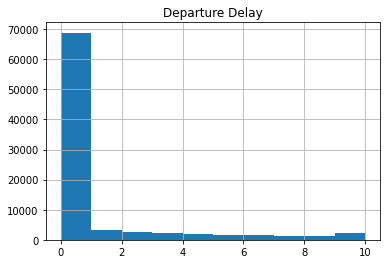

In [19]:
#drop Arrival Delay > 10 or Departure Delay >10 rows
filtered_df1 = filtered_df.filter((col('Arrival Delay') <= 10) & (col('Departure Delay') <= 10))

arrival_delay_data_1 = filtered_df1.select('Arrival Delay').toPandas()
arrival_delay_data_1.hist()
plt.title('Arrival Delay')
plt.show()

departure_delay_data_1 = filtered_df1.select('Departure Delay').toPandas()
departure_delay_data_1.hist()
plt.title('Departure Delay')
plt.show()

In [77]:
filtered_df1.write.csv("filtered_data.csv", header=True, mode="overwrite")

In [21]:
attributes_count = []
for col_name in filtered_df1.columns:
    valid_count = filtered_df1.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")

attribute 'ID                                    ' have 86775 valid data
attribute 'Gender                                ' have 86775 valid data
attribute 'Age                                   ' have 86775 valid data
attribute 'Customer Type                         ' have 86775 valid data
attribute 'Cabin Type                            ' have 86775 valid data
attribute 'Flight Distance                       ' have 86775 valid data
attribute 'Departure Delay                       ' have 86775 valid data
attribute 'Arrival Delay                         ' have 86775 valid data
attribute 'Departure and Arrival Time Convenience' have 86766 valid data
attribute 'Ease of Online Booking                ' have 86772 valid data
attribute 'Check-in Service                      ' have 86761 valid data
attribute 'Online Boarding                       ' have 86768 valid data
attribute 'Gate Location                         ' have 86769 valid data
attribute 'On-board Service                      ' 

3.2.2 Missing value issues

In [78]:
from pyspark.sql.functions import rand
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import when

df_03 = spark.read.csv('filtered_data.csv', header=True, inferSchema=True, encoding='ISO-8859-1')

df_03.printSchema()

random_int_udf = (rand() * 5 + 1).cast(IntegerType())

df_03 = df_03.withColumn(
    'Departure and Arrival Time Convenience',
    when(col('Departure and Arrival Time Convenience').isNull(),
         random_int_udf).otherwise(col('Departure and Arrival Time Convenience').cast(IntegerType())))

df_03.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

In [79]:
#fill all the missing values
columns_to_fill = [
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'Baggage Handling'
]

for col_name in columns_to_fill:
    random_int_udf = (rand() * 5 + 1).cast(IntegerType())
    df_03 = df_03.withColumn(col_name, when(col(col_name).isNull(), random_int_udf).otherwise(col(col_name).cast(IntegerType())))
    
df_03.printSchema()

attributes_count = []
for col_name in df_03.columns:
    valid_count = df_03.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")


df_03.write.csv("filling_data.csv", header=True, mode="overwrite")


root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

3.3 Construct a New Feature

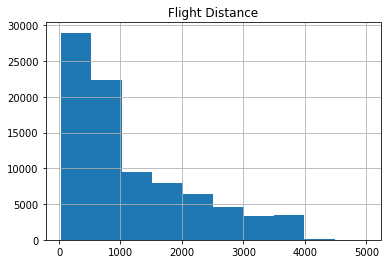

+-------+------------------+
|summary|   Flight Distance|
+-------+------------------+
|  count|             86775|
|   mean|1185.3332872371075|
| stddev|1004.0578233994374|
|    min|                31|
|    max|              4983|
+-------+------------------+

25% : 383.0
50% : 762.0
75% : 1562.0


In [80]:
file_path = "filling_data.csv"
df_03 = spark.read.csv(file_path, header=True, inferSchema=True, encoding='ISO-8859-1')

flight_distance_data = df_03.select('Flight Distance').toPandas()
flight_distance_data.hist()
plt.title('Flight Distance')
plt.show()

flight_distance_stats = df_03.describe('Flight Distance')
flight_distance_stats.show()
quantiles = df_03.approxQuantile("Flight Distance", [0.25, 0.50, 0.75], 0.05)

print(f"25% : {quantiles[0]}")
print(f"50% : {quantiles[1]}")
print(f"75% : {quantiles[2]}")

In [81]:
bins = [0, 833, 1744, float('inf')]
labels = ['short distance', 'moderate distance', 'long distance']

df_with_group = df_03.withColumn("Distance Group",
    when(df_03["Flight Distance"] <= bins[1], labels[0])
    .when((df_03["Flight Distance"] > bins[1]) & (df_03["Flight Distance"] <= bins[2]), labels[1])
    .otherwise(labels[2]))

df_with_group.select("Distance Group").show()
df_with_group.printSchema()

+-----------------+
|   Distance Group|
+-----------------+
|   short distance|
|moderate distance|
|    long distance|
|    long distance|
|    long distance|
|    long distance|
|moderate distance|
|    long distance|
|   short distance|
|moderate distance|
|   short distance|
|   short distance|
|   short distance|
|moderate distance|
|   short distance|
|moderate distance|
|   short distance|
|   short distance|
|    long distance|
|    long distance|
+-----------------+
only showing top 20 rows

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: in

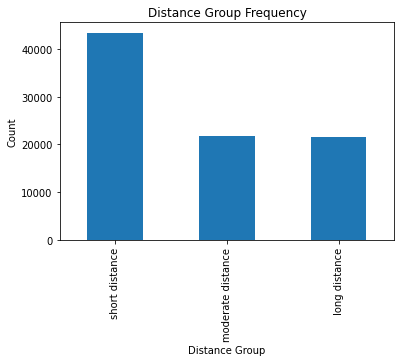

In [82]:
df_with_group.write.csv("with_group.csv", header=True, mode="overwrite")
file = 'with_group.csv'
df_03 = spark.read.csv(file, header=True, inferSchema=True, encoding='ISO-8859-1')
distance_group_counts = df_03.groupBy('Distance Group').count()
pandas_df = distance_group_counts.toPandas()
pandas_df.plot(kind='bar', x='Distance Group', y='count', title='Distance Group Frequency', legend=False)
plt.xlabel('Distance Group')
plt.ylabel('Count')
plt.show()

3.4 Integrate various data sources

In [83]:
df_03 = spark.read.csv('AirlineReviews.csv', header=True, inferSchema=True, encoding='ISO-8859-1')

df_03.printSchema()

root
 |-- EntertainmentRating: integer (nullable = true)
 |-- FoodRating: integer (nullable = true)
 |-- GroundServiceRating: integer (nullable = true)
 |-- OverallScore: integer (nullable = true)
 |-- Recommended: string (nullable = true)
 |-- SeatComfortRating: integer (nullable = true)
 |-- ServiceRating: integer (nullable = true)
 |-- ValueRating: integer (nullable = true)
 |-- WifiRating: integer (nullable = true)
 |-- ID: integer (nullable = true)



In [84]:
# Read the first CSV file
file1 = 'with_group.csv'
df1 = spark.read.csv(file1, header=True, inferSchema=True, encoding='ISO-8859-1')
df1.printSchema()

# Read the second CSV file
file2 = 'AirlineReviews.csv'
df2 = spark.read.csv(file2, header=True, inferSchema=True, encoding='ISO-8859-1')
df2.printSchema()

# Merge the two datasets on the 'ID' column
df_03 = df1.join(df2, 'ID')
df_03.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Cabin Type: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Departure Delay: integer (nullable = true)
 |-- Arrival Delay: integer (nullable = true)
 |-- Departure and Arrival Time Convenience: integer (nullable = true)
 |-- Ease of Online Booking: integer (nullable = true)
 |-- Check-in Service: integer (nullable = true)
 |-- Online Boarding: integer (nullable = true)
 |-- Gate Location: integer (nullable = true)
 |-- On-board Service: integer (nullable = true)
 |-- Seat Comfort: integer (nullable = true)
 |-- Leg Room Service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Food and Drink: integer (nullable = true)
 |-- In-flight Service: integer (nullable = true)
 |-- In-flight Entertainment: integer (nullable = true)
 |-- Baggage Handling: integer (nullable = true)

In [29]:
df_03.show(truncate=False)
df_03.show(26)

+---+------+---+-------------+------------+---------------+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+----------------+-----------+--------------+-----------------+-----------------------+----------------+-----------------------+-----------------+-------------------+----------+-------------------+------------+-----------+-----------------+-------------+-----------+----------+
|ID |Gender|Age|Customer Type|Cabin Type  |Flight Distance|Departure Delay|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|Leg Room Service|Cleanliness|Food and Drink|In-flight Service|In-flight Entertainment|Baggage Handling|Satisfaction           |Distance Group   |EntertainmentRating|FoodRating|GroundServiceRating|OverallScore|Recommended|SeatComfortRating|ServiceRating|ValueRating|Wi

+---+------+---+-------------+------------+---------------+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+----------------+-----------+--------------+-----------------+-----------------------+----------------+--------------------+-----------------+-------------------+----------+-------------------+------------+-----------+-----------------+-------------+-----------+----------+
| ID|Gender|Age|Customer Type|  Cabin Type|Flight Distance|Departure Delay|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|Leg Room Service|Cleanliness|Food and Drink|In-flight Service|In-flight Entertainment|Baggage Handling|        Satisfaction|   Distance Group|EntertainmentRating|FoodRating|GroundServiceRating|OverallScore|Recommended|SeatComfortRating|ServiceRating|ValueRating|WifiRati

In [85]:
df_03.write.csv('merged_dataset.csv', header=True, mode='overwrite')

In [86]:
file = 'merged_dataset.csv'
df_03 = spark.read.csv(file, header=True, inferSchema=True, encoding='ISO-8859-1')

df_03.columns


['ID',
 'Gender',
 'Age',
 'Customer Type',
 'Cabin Type',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction',
 'Distance Group',
 'EntertainmentRating',
 'FoodRating',
 'GroundServiceRating',
 'OverallScore',
 'Recommended',
 'SeatComfortRating',
 'ServiceRating',
 'ValueRating',
 'WifiRating']

In [87]:
data_types = df_03.dtypes
max_len = max(len(name) for name, _ in data_types)
print("Column Name".ljust(max_len + 5) + "Data Type")
for name, dtype in data_types:
    print(name.ljust(max_len + 5) + dtype)

Column Name                                Data Type
ID                                         int
Gender                                     string
Age                                        int
Customer Type                              string
Cabin Type                                 string
Flight Distance                            int
Departure Delay                            int
Arrival Delay                              int
Departure and Arrival Time Convenience     int
Ease of Online Booking                     int
Check-in Service                           int
Online Boarding                            int
Gate Location                              int
On-board Service                           int
Seat Comfort                               int
Leg Room Service                           int
Cleanliness                                int
Food and Drink                             int
In-flight Service                          int
In-flight Entertainment                    in

In [33]:
attributes_count = []
for col_name in df_03.columns:
    valid_count = df_03.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")


attribute 'ID                                    ' have 86455 valid data
attribute 'Gender                                ' have 86455 valid data
attribute 'Age                                   ' have 86455 valid data
attribute 'Customer Type                         ' have 86455 valid data
attribute 'Cabin Type                            ' have 86455 valid data
attribute 'Flight Distance                       ' have 86455 valid data
attribute 'Departure Delay                       ' have 86455 valid data
attribute 'Arrival Delay                         ' have 86455 valid data
attribute 'Departure and Arrival Time Convenience' have 86455 valid data
attribute 'Ease of Online Booking                ' have 86455 valid data
attribute 'Check-in Service                      ' have 86455 valid data
attribute 'Online Boarding                       ' have 86455 valid data
attribute 'Gate Location                         ' have 86455 valid data
attribute 'On-board Service                      ' 

In [34]:
import numpy as np
filled_df = df_03.withColumn("OverallScore", when(col("OverallScore").isNull(), 
            np.random.randint(1, 11)).otherwise(col("OverallScore")))
attributes_count = []
for col_name in filled_df.columns:
    valid_count = filled_df.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")

attribute 'ID                                    ' have 86455 valid data
attribute 'Gender                                ' have 86455 valid data
attribute 'Age                                   ' have 86455 valid data
attribute 'Customer Type                         ' have 86455 valid data
attribute 'Cabin Type                            ' have 86455 valid data
attribute 'Flight Distance                       ' have 86455 valid data
attribute 'Departure Delay                       ' have 86455 valid data
attribute 'Arrival Delay                         ' have 86455 valid data
attribute 'Departure and Arrival Time Convenience' have 86455 valid data
attribute 'Ease of Online Booking                ' have 86455 valid data
attribute 'Check-in Service                      ' have 86455 valid data
attribute 'Online Boarding                       ' have 86455 valid data
attribute 'Gate Location                         ' have 86455 valid data
attribute 'On-board Service                      ' 

In [88]:
df_03 = df_03.drop('GroundServiceRating', 'OverallScore', 'SeatComfortRating', 'WifiRating')
df_03.write.csv('DP_data.csv', header=True, mode='overwrite')
df_03 = spark.read.csv('DP_data.csv', header=True, inferSchema=True, encoding='ISO-8859-1')
df_03.columns

['ID',
 'Gender',
 'Age',
 'Customer Type',
 'Cabin Type',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction',
 'Distance Group',
 'EntertainmentRating',
 'FoodRating',
 'Recommended',
 'ServiceRating',
 'ValueRating']

4 Data transformation 

4.1 Reduce the data

4.1.1 Horizontal Reduction

In [89]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, ChiSqSelector
from pyspark.sql.functions import col
from pyspark.ml.functions import vector_to_array
import pandas as pd

spark = SparkSession.builder \
    .appName("Feature Selection and Horizontal Reduction") \
    .getOrCreate()

file = 'DP_data.csv'
df = spark.read.csv(file, header=True, inferSchema=True, encoding='ISO-8859-1')

string_cols = [col for col, dtype in df.dtypes if dtype == 'string' and col != 'Satisfaction']

for col_name in string_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_index")
    df = indexer.fit(df).transform(df)

# transfer target into integer type
satisfaction_indexer = StringIndexer(inputCol='Satisfaction', outputCol='Satisfaction_index')
df = satisfaction_indexer.fit(df).transform(df)

input_cols = [col for col in df.columns if col not in string_cols + ['Satisfaction']]
indexed_cols = [col + "_index" for col in string_cols]
input_cols += indexed_cols

threshold = 10000
valid_input_cols = []
for col_name in input_cols:
    unique_count = df.select(col_name).distinct().count()
    if unique_count < threshold:
        valid_input_cols.append(col_name)

assembler = VectorAssembler(inputCols=valid_input_cols, outputCol='features')
assembled_df = assembler.transform(df)

selector = ChiSqSelector(numTopFeatures=10, featuresCol='features', 
                         outputCol='selectedFeatures', labelCol='Satisfaction_index')
model = selector.fit(assembled_df)
selected_features = model.transform(assembled_df)

selected_indices = model.selectedFeatures

selected_feature_names = [valid_input_cols[i] for i in selected_indices]
print("Top 10 selected features:", selected_feature_names)

selected_features = selected_features.withColumn('selectedFeatures', vector_to_array(col('selectedFeatures')))

for i, feature_name in enumerate(selected_feature_names):
    selected_features = selected_features.withColumn(feature_name, col('selectedFeatures')[i])

columns_to_save = selected_feature_names + ['Satisfaction']

selected_features.select(columns_to_save).write.csv('Horizontal_Reduction_dataset.csv', header=True, mode='overwrite')

df_04 = spark.read.csv('Horizontal_Reduction_dataset.csv', header=True, inferSchema=True, encoding='ISO-8859-1')

df_04.columns

Top 10 selected features: ['Age', 'Flight Distance', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort']


['Age',
 'Flight Distance',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Satisfaction']

In [37]:
attributes_count = []
for col_name in df_04.columns:
    valid_count = df_04.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")

attribute 'Age                                   ' have 86455 valid data
attribute 'Flight Distance                       ' have 86455 valid data
attribute 'Arrival Delay                         ' have 86455 valid data
attribute 'Departure and Arrival Time Convenience' have 86455 valid data
attribute 'Ease of Online Booking                ' have 86455 valid data
attribute 'Check-in Service                      ' have 86455 valid data
attribute 'Online Boarding                       ' have 86455 valid data
attribute 'Gate Location                         ' have 86455 valid data
attribute 'On-board Service                      ' have 86455 valid data
attribute 'Seat Comfort                          ' have 86455 valid data
attribute 'Satisfaction                          ' have 86455 valid data


4.1.2 Vertical Reduction

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 创建 Spark 会话
spark = SparkSession.builder \
    .appName("Data Preprocessing with Spark") \
    .getOrCreate()

# 读取数据
file_path = 'Horizontal_Reduction_dataset.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/22 23:18:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


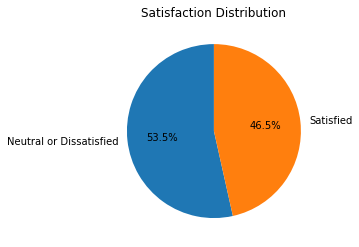

In [3]:
import matplotlib.pyplot as plt

satisfaction_counts = df.groupBy("Satisfaction").count().toPandas()
satisfaction_counts.set_index("Satisfaction", inplace=True)
satisfaction_counts.plot(kind='pie', y='count', autopct='%1.1f%%', startangle=90, legend=None)
plt.title("Satisfaction Distribution")
plt.ylabel("")  # 隐藏 y 轴标签
plt.show()


In [4]:
from pyspark.sql.functions import col,rand

# Get the count of each category
class_counts = df.groupBy("Satisfaction").count().collect()
min_count = min(class_counts, key=lambda x: x['count'])['count']

# downsample each category
resampled_df = None
for class_count in class_counts:
    fraction = min_count / class_count['count']
    sampled_df = df.filter(col("Satisfaction") == class_count['Satisfaction']).sample(False, fraction, seed=42)
    resampled_df = sampled_df if resampled_df is None else resampled_df.union(sampled_df)
    
resampled_df = resampled_df.orderBy(rand())

resampled_df.groupBy("Satisfaction").count().show()

resampled_df.select("Satisfaction").show(50)

+--------------------+-----+
|        Satisfaction|count|
+--------------------+-----+
|Neutral or Dissat...|40271|
|           Satisfied|40203|
+--------------------+-----+

+--------------------+
|        Satisfaction|
+--------------------+
|           Satisfied|
|           Satisfied|
|Neutral or Dissat...|
|           Satisfied|
|Neutral or Dissat...|
|Neutral or Dissat...|
|Neutral or Dissat...|
|           Satisfied|
|Neutral or Dissat...|
|Neutral or Dissat...|
|           Satisfied|
|           Satisfied|
|Neutral or Dissat...|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|Neutral or Dissat...|
|           Satisfied|
|Neutral or Dissat...|
|           Satisfied|
|Neutral or Dissat...|
|Neutral or Dissat...|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|           Satisfied|
|Neutral or Dissat...|
|           Satisfied|
|           Satisfie

+--------------------+-----+
|        Satisfaction|count|
+--------------------+-----+
|Neutral or Dissat...|40271|
|           Satisfied|40203|
+--------------------+-----+



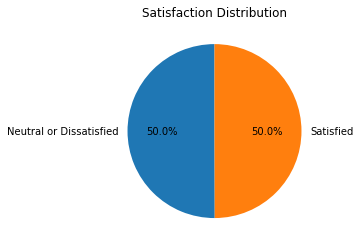

In [93]:
resampled_df.write.csv('Vertical Reduction.csv', header=True, mode='overwrite')
vr_df = spark.read.csv('Vertical Reduction.csv', header=True, inferSchema=True)
vr_df.groupBy("Satisfaction").count().show()

import matplotlib.pyplot as plt

satisfaction_counts = vr_df.groupBy("Satisfaction").count().toPandas()
satisfaction_counts.set_index("Satisfaction", inplace=True)
satisfaction_counts.plot(kind='pie', y='count', autopct='%1.1f%%', startangle=90, legend=None)
plt.title("Satisfaction Distribution")
plt.ylabel("")  # 隐藏 y 轴标签
plt.show()

# 可选：再次使用 Matplotlib 查看下采样后的分布


In [94]:
attributes_count = []
for col_name in vr_df.columns:
    valid_count = vr_df.filter(col(col_name).isNotNull()).count()
    attributes_count.append((col_name, valid_count))
max_attr_len = max(len(attr) for attr, _ in attributes_count)
for attr, count in attributes_count:
    print(f"attribute '{attr.ljust(max_attr_len)}' have {count} valid data")

attribute 'Age                                   ' have 80474 valid data
attribute 'Flight Distance                       ' have 80474 valid data
attribute 'Arrival Delay                         ' have 80474 valid data
attribute 'Departure and Arrival Time Convenience' have 80474 valid data
attribute 'Ease of Online Booking                ' have 80474 valid data
attribute 'Check-in Service                      ' have 80474 valid data
attribute 'Online Boarding                       ' have 80474 valid data
attribute 'Gate Location                         ' have 80474 valid data
attribute 'On-board Service                      ' have 80474 valid data
attribute 'Seat Comfort                          ' have 80474 valid data
attribute 'Satisfaction                          ' have 80474 valid data


4.2 Project the data

+-------+-----------------+
|summary|  Flight Distance|
+-------+-----------------+
|  count|            80474|
|   mean|1206.226694336059|
| stddev|1015.452040686897|
|    min|             31.0|
|    max|           4983.0|
+-------+-----------------+

+-------+------------------+
|summary|   Online Boarding|
+-------+------------------+
|  count|             80474|
|   mean|3.3344558490941174|
| stddev| 1.359480270896482|
|    min|               0.0|
|    max|               5.0|
+-------+------------------+

+-------------------------+
|skewness(Flight Distance)|
+-------------------------+
|       1.0631150985160671|
+-------------------------+

+-------------------------+
|skewness(Online Boarding)|
+-------------------------+
|      -0.5680793913169441|
+-------------------------+



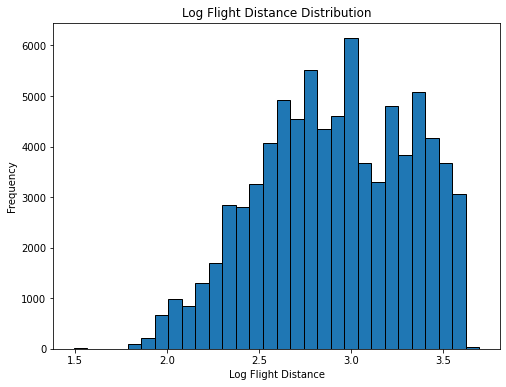

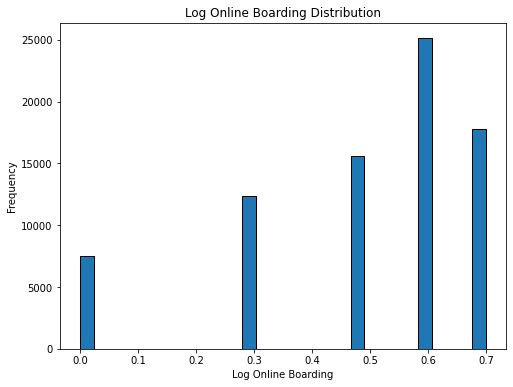

In [95]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Project the data") \
    .getOrCreate()

file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
from pyspark.sql.functions import skewness, log10, col, when

df.describe('Flight Distance').show()
df.describe('Online Boarding').show()

# skewness
df.select(skewness(col('Flight Distance'))).show()
df.select(skewness(col('Online Boarding'))).show()

df = df.withColumn('Log_Flight_Distance', log10(col('Flight Distance')))
df = df.withColumn('Online_Boarding', when(col('Online Boarding') <= 0, None)
                   .otherwise(col('Online Boarding')))
df = df.withColumn('Log_Online_Boarding', log10(col('Online Boarding')))

log_flight_distance_pd = df.select('Log_Flight_Distance').dropna().toPandas()
log_online_boarding_pd = df.select('Log_Online_Boarding').dropna().toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(log_flight_distance_pd['Log_Flight_Distance'], bins=30, edgecolor='k')
plt.title('Log Flight Distance Distribution')
plt.xlabel('Log Flight Distance')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(log_online_boarding_pd['Log_Online_Boarding'], bins=30, edgecolor='k')
plt.title('Log Online Boarding Distribution')
plt.xlabel('Log Online Boarding')
plt.ylabel('Frequency')
plt.show()


6.3 Build appropriate model and choose relevant parameters

6.3.1 Build model

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("C&R Tree Example") \
    .getOrCreate()

file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.printSchema()
df.show(20)

satisfaction_counts = df.groupBy("Satisfaction").count()
satisfaction_counts.show()



root
 |-- Age: double (nullable = true)
 |-- Flight Distance: double (nullable = true)
 |-- Arrival Delay: double (nullable = true)
 |-- Departure and Arrival Time Convenience: double (nullable = true)
 |-- Ease of Online Booking: double (nullable = true)
 |-- Check-in Service: double (nullable = true)
 |-- Online Boarding: double (nullable = true)
 |-- Gate Location: double (nullable = true)
 |-- On-board Service: double (nullable = true)
 |-- Seat Comfort: double (nullable = true)
 |-- Satisfaction: string (nullable = true)

+----+---------------+-------------+--------------------------------------+----------------------+----------------+---------------+-------------+----------------+------------+--------------------+
| Age|Flight Distance|Arrival Delay|Departure and Arrival Time Convenience|Ease of Online Booking|Check-in Service|Online Boarding|Gate Location|On-board Service|Seat Comfort|        Satisfaction|
+----+---------------+-------------+-------------------------------------

In [6]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler

indexer = StringIndexer(inputCol="Satisfaction", outputCol="label")
df = indexer.fit(df).transform(df)

# 合并特征列
feature_columns = df.columns
feature_columns.remove("Satisfaction")  # 移除目标列
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol="features", labelCol="label", maxDepth=5，maxBins=32)


7 Data Mining

7.1 Create and justify test designs

In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Decision Tree Classification") \
    .getOrCreate()

# Load data
file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert target column to numeric
indexer = StringIndexer(inputCol="Satisfaction", outputCol="target")
df = indexer.fit(df).transform(df)

# Combine feature columns
feature_columns = df.columns
feature_columns.remove("Satisfaction")  # Remove target column
feature_columns.remove("target")  # Remove the newly created label column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Split data into train and test sets
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Check the number of rows and columns in the train and test DataFrames
print("Train DataFrame - Rows:", train_df.count(), "Columns:", len(train_df.columns))
print("Test DataFrame - Rows:", test_df.count(), "Columns:", len(test_df.columns))

Train DataFrame - Rows: 64491 Columns: 13
Test DataFrame - Rows: 15983 Columns: 13


7.2 Conduct data mining

7.2.1 Create C&R Tree model 

In [22]:
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)

7.2.2 Model evaluation

In [23]:
# Make predictions
predictions = dt_model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Model Accuracy: {accuracy}")

# Generate confusion matrix
predictions.groupBy("target", "prediction").count().show()

Model Accuracy: 0.8335731714947131
+------+----------+-----+
|target|prediction|count|
+------+----------+-----+
|   1.0|       1.0| 7185|
|   0.0|       1.0| 1859|
|   1.0|       0.0|  801|
|   0.0|       0.0| 6138|
+------+----------+-----+



In [25]:
# Generate confusion matrix
conf_matrix = predictions.groupBy("target", "prediction").count()
conf_matrix.show()

# Calculate precision, recall, and F1 score manually
# Get the labels
labels = df.select("target").distinct().rdd.flatMap(lambda x: x).collect()

# Create an empty dictionary to hold metrics
metrics = {label: {"TP": 0, "FP": 0, "FN": 0} for label in labels}

# Populate the metrics dictionary
for row in conf_matrix.collect():
    label = row["target"]
    prediction = row["prediction"]
    count = row["count"]
    if label == prediction:
        metrics[label]["TP"] += count
    else:
        metrics[label]["FP"] += count
        metrics[prediction]["FN"] += count


# Calculate precision, recall, and F1 score for each label
for label in labels:
    tp = metrics[label]["TP"]
    fp = metrics[label]["FP"]
    fn = metrics[label]["FN"]
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    metrics[label]["Precision"] = precision
    metrics[label]["Recall"] = recall
    metrics[label]["F1"] = f1

# Print the metrics
for target, metric in metrics.items():
    print(f"target: {target}")
    print(f"Precision: {metric['Precision']:.4f}")
    print(f"Recall: {metric['Recall']:.4f}")
    print(f"F1 Score: {metric['F1']:.4f}")
    print()






+------+----------+-----+
|target|prediction|count|
+------+----------+-----+
|   1.0|       1.0| 7185|
|   0.0|       1.0| 1859|
|   1.0|       0.0|  801|
|   0.0|       0.0| 6138|
+------+----------+-----+

target: 0.0
Precision: 0.7675
Recall: 0.8846
F1 Score: 0.8219

target: 1.0
Precision: 0.8997
Recall: 0.7944
F1 Score: 0.8438



7.2.3 Print C&R Tree rules

In [31]:
# Get the debug string of the decision tree 
tree_debug_string = dt_model._java_obj.toDebugString()

# Print the debugging string of the decision tree. You can view the decision tree structure and rules on the console.打印决策树的调试字符串，可以在控制台查看决策树结构和规则
print(tree_debug_string)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_afae91381b10, depth=5, numNodes=39, numClasses=2, numFeatures=10
  If (feature 6 <= 3.5)
   If (feature 4 <= 0.5)
    If (feature 1 <= 254.0)
     If (feature 3 <= 0.5)
      If (feature 0 <= 34.5)
       Predict: 1.0
      Else (feature 0 > 34.5)
       Predict: 0.0
     Else (feature 3 > 0.5)
      If (feature 6 <= 0.5)
       Predict: 0.0
      Else (feature 6 > 0.5)
       Predict: 1.0
    Else (feature 1 > 254.0)
     If (feature 0 <= 33.5)
      Predict: 1.0
     Else (feature 0 > 33.5)
      If (feature 3 <= 0.5)
       Predict: 0.0
      Else (feature 3 > 0.5)
       Predict: 1.0
   Else (feature 4 > 0.5)
    If (feature 4 <= 3.5)
     If (feature 1 <= 1628.5)
      Predict: 0.0
     Else (feature 1 > 1628.5)
      If (feature 8 <= 3.5)
       Predict: 0.0
      Else (feature 8 > 3.5)
       Predict: 1.0
    Else (feature 4 > 3.5)
     If (feature 8 <= 3.5)
      If (feature 5 <= 4.5)
       Predict: 0.0
      Else (fe

7.3 Search for patterns

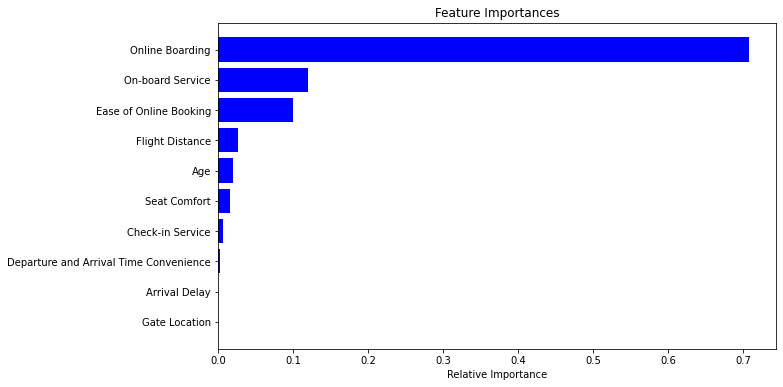

In [33]:
import matplotlib.pyplot as plt
importances = dt_model.featureImportances.toArray()
features_importances = list(zip(feature_columns, importances))
features_importances.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted features and importances
sorted_features, sorted_importances = zip(*features_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='b')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()


8 Interpretation 

8.2.3 Evaluation on Model Performance

In [4]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 29.9 MB/s eta 0:00:00


Train DataFrame - Rows: 64491 Columns: 13
Test DataFrame - Rows: 15983 Columns: 13


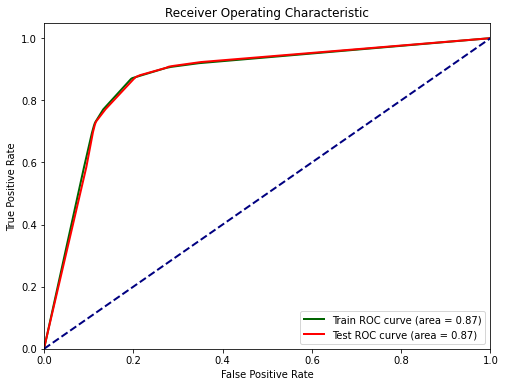

Train Area Under ROC Curve (AUC): 0.8709093840119625
Test Area Under ROC Curve (AUC): 0.8696158160487243


In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Decision Tree Classification") \
    .getOrCreate()

# Load data
file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert target column to numeric
indexer = StringIndexer(inputCol="Satisfaction", outputCol="target")
df = indexer.fit(df).transform(df)

# Combine feature columns
feature_columns = df.columns
feature_columns.remove("Satisfaction")  # Remove target column
feature_columns.remove("target")  # Remove the newly created label column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Split data into train and test sets
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Check the number of rows and columns in the train and test DataFrames
print("Train DataFrame - Rows:", train_df.count(), "Columns:", len(train_df.columns))
print("Test DataFrame - Rows:", test_df.count(), "Columns:", len(test_df.columns))

# Train Decision Tree model
dt = DecisionTreeClassifier(labelCol="target", featuresCol="features")
model = dt.fit(train_df)

# Evaluate on train and test data
train_predictions = model.transform(train_df)
test_predictions = model.transform(test_df)

# Extract probability and label
train_predictions_prob = train_predictions.select(['probability', 'target']).rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
test_predictions_prob = test_predictions.select(['probability', 'target']).rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))

# Calculate ROC curve and AUC for train data
train_probs = np.array(train_predictions_prob.map(lambda x: x[0]).collect())
train_labels = np.array(train_predictions_prob.map(lambda x: x[1]).collect())
train_fpr, train_tpr, _ = roc_curve(train_labels, train_probs)
train_roc_auc = auc(train_fpr, train_tpr)

# Calculate ROC curve and AUC for test data
test_probs = np.array(test_predictions_prob.map(lambda x: x[0]).collect())
test_labels = np.array(test_predictions_prob.map(lambda x: x[1]).collect())
test_fpr, test_tpr, _ = roc_curve(test_labels, test_probs)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='darkgreen', lw=2, label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("Train Area Under ROC Curve (AUC):", train_roc_auc)
print("Test Area Under ROC Curve (AUC):", test_roc_auc)


8.5.1 Adjusting Partition size

Test size = 0.2

In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Decision Tree Classification") \
    .getOrCreate()

# Load data
file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert target column to numeric
indexer = StringIndexer(inputCol="Satisfaction", outputCol="target")
df = indexer.fit(df).transform(df)

# Combine feature columns
feature_columns = df.columns
feature_columns.remove("Satisfaction")  # Remove target column
feature_columns.remove("target")  # Remove the newly created label column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)
# Split data into train and test sets
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)
# Make predictions
predictions = dt_model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test size = 0.2")
print(f"Model Accuracy: {accuracy}")

Test size = 0.2
Model Accuracy: 0.8341362697866483


Test size = 0.3

In [16]:
train_df, test_df = df.randomSplit([0.7, 0.3], seed=42)
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)
# Make predictions
predictions = dt_model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test size = 0.3")
print(f"Model Accuracy: {accuracy}")

Test size = 0.3
Model Accuracy: 0.8313751724714639


Test size = 0.25

In [20]:
train_df, test_df = df.randomSplit([0.75, 0.25], seed=42)
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)
# Make predictions
predictions = dt_model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test size = 0.25")
print(f"Model Accuracy: {accuracy}")

Test size = 0.25
Model Accuracy: 0.8353765323992994


Test size = 0.4

In [31]:
train_df, test_df = df.randomSplit([0.6, 0.4], seed=42)
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)
# Make predictions
predictions = dt_model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test size = 0.4")
print(f"Model Accuracy: {accuracy}")

Test size = 0.4
Model Accuracy: 0.8338801912440236


Test size = 0.5

In [32]:
train_df, test_df = df.randomSplit([0.5, 0.5], seed=42)
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="target", maxDepth=5)
dt_model = dt.fit(train_df)
# Make predictions
predictions = dt_model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test size = 0.5")
print(f"Model Accuracy: {accuracy}")

Test size = 0.5
Model Accuracy: 0.8346545019443613


8.5.2 Boost C&R Tree algorithm

In [37]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder \
    .appName("GBT Classification") \
    .getOrCreate()

# Load data
file_path = "Vertical Reduction.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Convert target column to numeric
indexer = StringIndexer(inputCol="Satisfaction", outputCol="target")
df = indexer.fit(df).transform(df)

# Combine feature columns
feature_columns = df.columns
feature_columns.remove("Satisfaction")  # Remove target column
feature_columns.remove("target")  # Remove the newly created label column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Split data into train and test sets
train_df, test_df = df.randomSplit([0.3, 0.7], seed=42)
# Train GBT model
gbt = GBTClassifier(labelCol="target", featuresCol="features", maxIter=50, seed=42)
model = gbt.fit(train_df)
# Make predictions
predictions = model.transform(test_df)
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8774
